In [ ]:
#import necessary libraries

In [3]:
import pandas as pd
import seaborn as sns

In [ ]:
#DATASET SELECTION
#let's import Breast cancer wisconsin (diagnostic) dataset to classify
#tumors as either benign (non-cancerous) or malignant (cancerous) based on various medical attributes of cell nuclei obtained from a biopsy
#let's use it for binary classification.

In [4]:
df = pd.read_csv('/content/cancer_classification.csv')

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
#the last column of df [benign_0__mal_1] is 0 if the tumor is benign and 1 if tumor is mal

In [28]:
#PREPROCESSING
#check for any missing values

<Axes: >

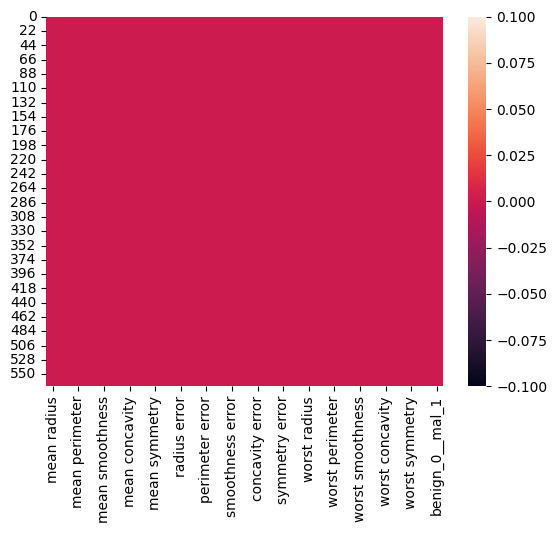

In [6]:
sns.heatmap(df.isnull())
#there are no missing values , so we can proceed to the next step

In [ ]:
#compare the count of two tumors for data visualisation

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

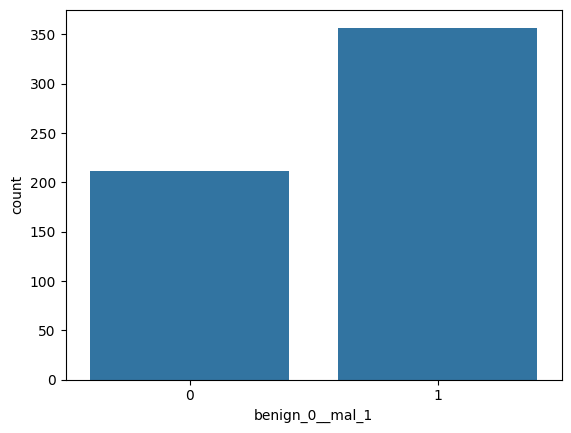

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

In [ ]:
#drop 'benign_0__mal_1' column and name it X and the column 'benign_0__mal_1' as y which we will predict using neural network

In [8]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
#scaleing of data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler()

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Model Development

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
#since it is a binary classification , we are using ReLu activation function for hidden layers and sigmoid for output layer
#and binary cross entropy as loss function with adam optimizer.

In [16]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.6880 - val_loss: 0.6652
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6635 - val_loss: 0.6450
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6462 - val_loss: 0.6270
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6269 - val_loss: 0.6091
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6030 - val_loss: 0.5825
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5784 - val_loss: 0.5474
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5515 - val_loss: 0.5101
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5125 - val_loss: 0.4690
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4599 - val_loss: 0.4237
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4162 - val_loss: 0.3725
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3724 - val_loss: 0.3270
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [18]:
model_loss = pd.DataFrame(model.history.history)

In [19]:
model_loss

,loss,val_loss
0,0.683733,0.665240
1,0.658979,0.644986
2,0.640492,0.627039
3,0.623479,0.609147
4,0.602076,0.582487
...,...,...
595,0.023951,0.204173
596,0.023843,0.205863
597,0.024062,0.195231
598,0.021566,0.211669


<Axes: >

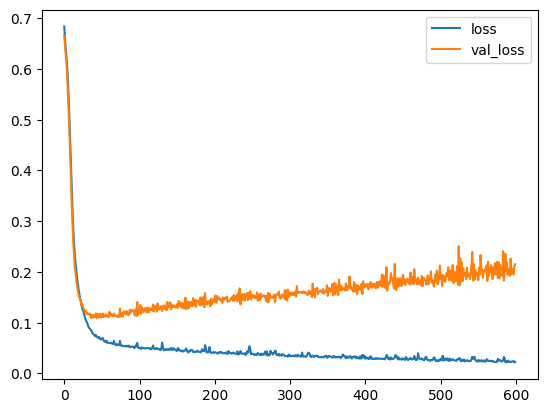

In [20]:
model_loss.plot()

In [ ]:
#we can see deviation between val_loss and loss due to overfitting the number of epochs.
#to counter this we can use EarlyStopping

In [21]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
  )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.6901 - val_loss: 0.6656
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6626 - val_loss: 0.6409
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6322 - val_loss: 0.6157
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6110 - val_loss: 0.5864
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5839 - val_loss: 0.5516
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5352 - val_loss: 0.5100
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5066 - val_loss: 0.4642
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4468 - val_loss: 0.4147
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4087 - val_loss: 0.3597
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3585 - val_loss: 0.3164
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3279 - val_loss: 0.2842
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

<Axes: >

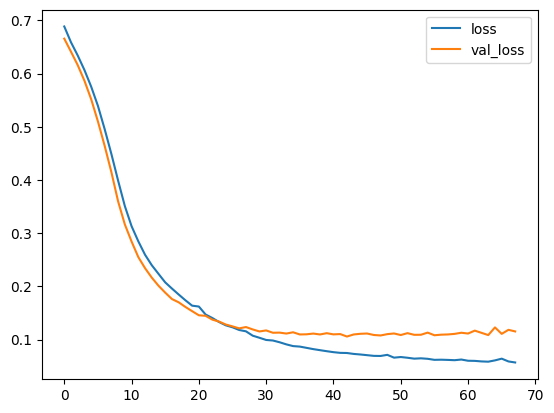

In [22]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
#after we use EarlyStopping there is no overfitting noe and epochs stopped at 60-70 where overfitting is happening

In [ ]:
#to get predictions as either 0 or 1 , we can use the following code.

In [23]:
predictions = (model.predict(X_test) > 0.5)*1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [24]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [ ]:
# Evaluation and Results

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [27]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
